In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from pywaffle import Waffle
import math
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import norm
import statistics
from matplotlib.cbook import boxplot_stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

In [2]:
df = pd.read_csv('base_dummy.csv')

In [3]:
df.head()

,Preço da venda,Zona,Qualidade do Aquecimento,Número de Quartos,Área da Garagem,Área do Lote,Número de Banheiros,Idade do Imóvel,Alta Densidade Residencial,Baixa Densidade Residencial,Comercial,Média Densidade Residencial,Vila Flutuante Residencial,Bom,Excelente,Médio,Razoável,Ruim
0,208500.0,Baixa Densidade Residencial,Excelente,3,548.0,8450,2,5,0,1,0,0,0,0,1,0,0,0
1,181500.0,Baixa Densidade Residencial,Excelente,3,460.0,9600,2,31,0,1,0,0,0,0,1,0,0,0
2,223500.0,Baixa Densidade Residencial,Excelente,3,608.0,11250,2,7,0,1,0,0,0,0,1,0,0,0
3,140000.0,Baixa Densidade Residencial,Bom,3,642.0,9550,1,91,0,1,0,0,0,1,0,0,0,0
4,250000.0,Baixa Densidade Residencial,Excelente,4,836.0,14260,2,8,0,1,0,0,0,0,1,0,0,0


In [4]:
# Verificar se há dados em branco nas variáveis independentes
df.isna().sum()

Preço da venda                 0
Zona                           4
Qualidade do Aquecimento       0
Número de Quartos              0
Área da Garagem                1
Área do Lote                   0
Número de Banheiros            0
Idade do Imóvel                0
Alta Densidade Residencial     0
Baixa Densidade Residencial    0
Comercial                      0
Média Densidade Residencial    0
Vila Flutuante Residencial     0
Bom                            0
Excelente                      0
Médio                          0
Razoável                       0
Ruim                           0
dtype: int64

In [5]:
linhas_excluir_zona = df[df['Zona'].isna()].index
linhas_excluir_area_garagem = df[df['Área da Garagem'].isna()].index

In [6]:
df = df.drop(linhas_excluir_zona).drop(linhas_excluir_area_garagem)

In [7]:
df.isna().sum()

Preço da venda                 0
Zona                           0
Qualidade do Aquecimento       0
Número de Quartos              0
Área da Garagem                0
Área do Lote                   0
Número de Banheiros            0
Idade do Imóvel                0
Alta Densidade Residencial     0
Baixa Densidade Residencial    0
Comercial                      0
Média Densidade Residencial    0
Vila Flutuante Residencial     0
Bom                            0
Excelente                      0
Médio                          0
Razoável                       0
Ruim                           0
dtype: int64

In [8]:
df.columns

Index(['Preço da venda', 'Zona', 'Qualidade do Aquecimento',
       'Número de Quartos', 'Área da Garagem', 'Área do Lote',
       'Número de Banheiros', 'Idade do Imóvel', 'Alta Densidade Residencial',
       'Baixa Densidade Residencial', 'Comercial',
       'Média Densidade Residencial', 'Vila Flutuante Residencial', 'Bom',
       'Excelente', 'Médio', 'Razoável', 'Ruim'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2914 entries, 0 to 2918
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Preço da venda               2914 non-null   float64
 1   Zona                         2914 non-null   object 
 2   Qualidade do Aquecimento     2914 non-null   object 
 3   Número de Quartos            2914 non-null   int64  
 4   Área da Garagem              2914 non-null   float64
 5   Área do Lote                 2914 non-null   int64  
 6   Número de Banheiros          2914 non-null   int64  
 7   Idade do Imóvel              2914 non-null   int64  
 8   Alta Densidade Residencial   2914 non-null   int64  
 9   Baixa Densidade Residencial  2914 non-null   int64  
 10  Comercial                    2914 non-null   int64  
 11  Média Densidade Residencial  2914 non-null   int64  
 12  Vila Flutuante Residencial   2914 non-null   int64  
 13  Bom               

# Verificar correlacao entre variaveis independentes com variavel dependente

In [10]:
df.corr()

,Preço da venda,Número de Quartos,Área da Garagem,Área do Lote,Número de Banheiros,Idade do Imóvel,Alta Densidade Residencial,Baixa Densidade Residencial,Comercial,Média Densidade Residencial,Vila Flutuante Residencial,Bom,Excelente,Médio,Razoável,Ruim
Preço da venda,1.000000,0.229069,0.466028,0.294774,0.434038,-0.365714,-0.054819,0.212352,-0.075788,-0.230241,0.035964,-0.098826,0.305779,-0.218427,-0.093859,-0.019413
Número de Quartos,0.229069,1.000000,0.073838,0.132396,0.355370,0.052911,0.024959,0.137023,-0.043075,-0.100894,-0.087417,-0.011264,-0.013581,0.028535,-0.009983,-0.011498
Área da Garagem,0.466028,0.073838,1.000000,0.218041,0.408527,-0.480165,-0.046144,0.192796,-0.094429,-0.250792,0.113504,-0.106968,0.314101,-0.212475,-0.116902,-0.013147
Área do Lote,0.294774,0.132396,0.218041,1.000000,0.127010,-0.031869,-0.031902,0.245593,-0.021606,-0.206772,-0.102599,-0.021231,0.018337,-0.000624,-0.004741,-0.008298
Número de Banheiros,0.434038,0.355370,0.408527,0.127010,1.000000,-0.471980,0.001481,0.123541,-0.082149,-0.217812,0.166005,-0.093115,0.333594,-0.265646,-0.064893,-0.003237
Idade do Imóvel,-0.365714,0.052911,-0.480165,-0.031869,-0.471980,1.000000,0.058734,-0.287105,0.156373,0.413816,-0.240398,0.162407,-0.461145,0.305939,0.173961,0.032529
Alta Densidade Residencial,-0.054819,0.024959,-0.046144,-0.031902,0.001481,0.058734,1.000000,-0.177256,-0.008826,-0.041027,-0.021236,-0.002267,-0.031417,0.043050,-0.017132,-0.002487
Baixa Densidade Residencial,0.212352,0.137023,0.192796,0.245593,0.123541,-0.287105,-0.177256,1.000000,-0.173783,-0.807779,-0.418107,-0.050132,0.056220,-0.006478,-0.030707,-0.048959
Comercial,-0.075788,-0.043075,-0.094429,-0.021606,-0.082149,0.156373,-0.008826,-0.173783,1.000000,-0.040223,-0.020820,-0.000671,-0.058001,0.038121,0.068324,-0.002438
Média Densidade Residencial,-0.230241,-0.100894,-0.250792,-0.206772,-0.217812,0.413816,-0.041027,-0.807779,-0.040223,1.000000,-0.096774,0.095306,-0.154264,0.071015,0.045840,0.060609


# Approach 1: coloco 1 variavel por vez para gerar a regressao

In [11]:
corr_matrix = df.corr()

#colocar os valores de correlação tudo positivo
ordem_corr_var_ind = corr_matrix[['Preço da venda']].applymap(lambda x: x if x > 0 else -1*x)
ordem_corr_var_ind

,Preço da venda
Preço da venda,1.000000
Número de Quartos,0.229069
Área da Garagem,0.466028
Área do Lote,0.294774
Número de Banheiros,0.434038
Idade do Imóvel,0.365714
Alta Densidade Residencial,0.054819
Baixa Densidade Residencial,0.212352
Comercial,0.075788
Média Densidade Residencial,0.230241


In [12]:
ordem_corr_var_ind = ordem_corr_var_ind.sort_values(['Preço da venda'], ascending=False)
ordem_corr_var_ind = ordem_corr_var_ind.drop(['Preço da venda'])
ordem_corr_var_ind

,Preço da venda
Área da Garagem,0.466028
Número de Banheiros,0.434038
Idade do Imóvel,0.365714
Excelente,0.305779
Área do Lote,0.294774
Média Densidade Residencial,0.230241
Número de Quartos,0.229069
Médio,0.218427
Baixa Densidade Residencial,0.212352
Bom,0.098826


In [13]:
#lista com nome das variaveis independentes que serao adicionadas
variaveis_da_equacao = []
RSS_total = []
coef_determinacao_total = []
p_value_total = []

for variavel in range(ordem_corr_var_ind.shape[0]):
    # nome da variavel que estou add no modelo
    nome_varivel_ind_add = ordem_corr_var_ind.index[variavel]
    
    # adiciono a variavel na lista
    variaveis_da_equacao.append(nome_varivel_ind_add)
    
    #conjunto das variaveis independentes
    X = df[variaveis_da_equacao].values
    
    #variavel dependente (preco)
    y = df[['Preço da venda']].values
    
    #instancio classe de regressao linear
    lm = LinearRegression()

    # faco o fit dos dados
    lm.fit(X,y)

    # Geracao da previsao baseado no conjunto de variaveis independentes X
    yhat = lm.predict(X)
    
    # Residual sum of squares 
    RSS_total.append(np.mean((yhat - y) ** 2))
    
    # retorna o valor do R² - coeficiente de determinacao
    coef_determinacao_total.append(lm.score(X, y))
    
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    
    # registro os pvalues
    p_value_total.append(list((pd.DataFrame(est2.pvalues))[0]))
    
    print(est2.summary())    

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     807.9
Date:                Mon, 04 Oct 2021   Prob (F-statistic):          4.69e-157
Time:                        18:45:43   Log-Likelihood:                -35708.
No. Observations:                2914   AIC:                         7.142e+04
Df Residuals:                    2912   BIC:                         7.143e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.213e+05   2270.359     53.419      0.0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     125.0
Date:                Mon, 04 Oct 2021   Prob (F-statistic):          2.12e-268
Time:                        18:45:43   Log-Likelihood:                -35417.
No. Observations:                2914   AIC:                         7.086e+04
Df Residuals:                    2900   BIC:                         7.095e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.335e+04   6001.157      8.890      0.0

Text(0.5, 1.0, 'RSS por quantidade de variaveis')

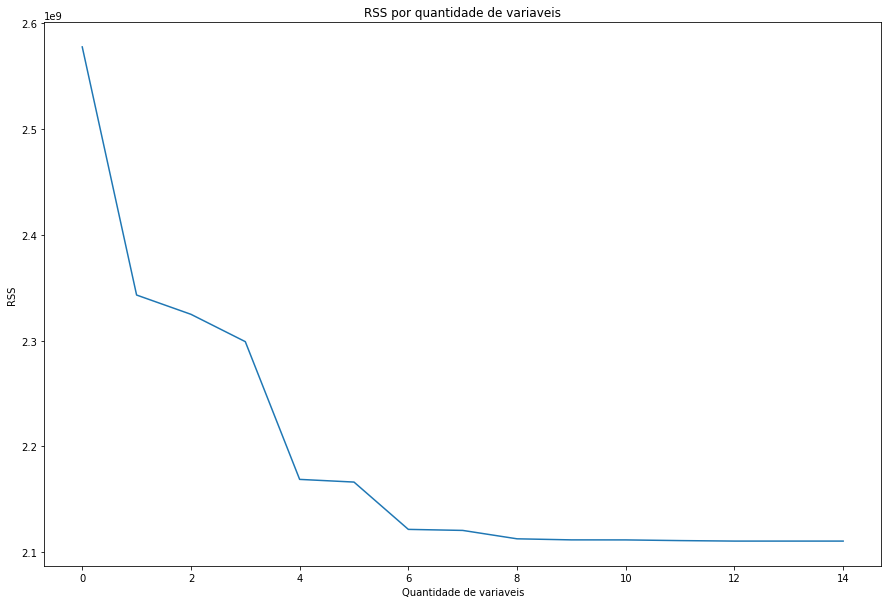

In [14]:
pd.DataFrame(RSS_total).plot(kind='line', legend=None, figsize=(15,10))
plt.xlabel("Quantidade de variaveis")
plt.ylabel("RSS")
plt.title("RSS por quantidade de variaveis")

Text(0.5, 1.0, 'Coeficiente de determinação por quantidade de variaveis')

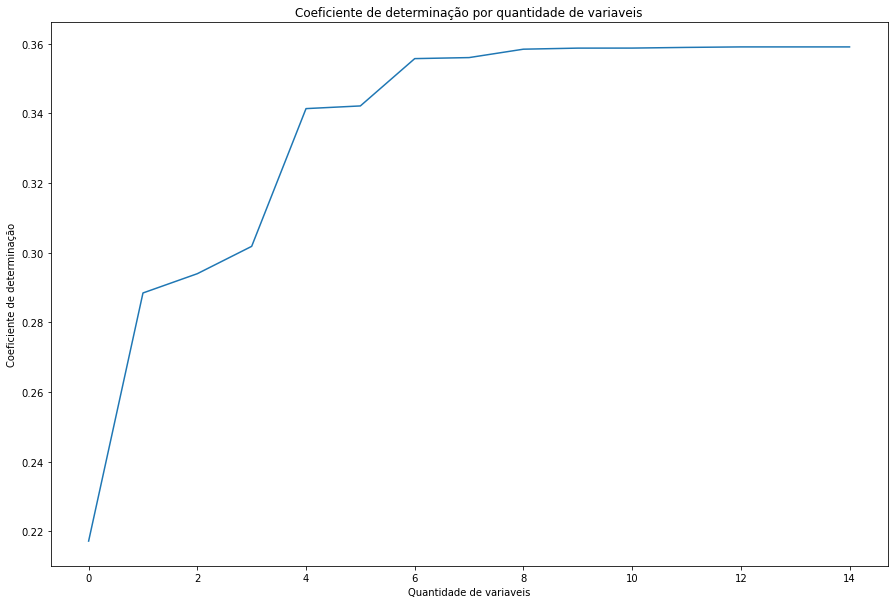

In [15]:
pd.DataFrame(coef_determinacao_total).plot(kind='line', legend=None, figsize=(15,10))
plt.xlabel("Quantidade de variaveis")
plt.ylabel("Coeficiente de determinação")
plt.title("Coeficiente de determinação por quantidade de variaveis")

<ipython-input-16-c3f4d3dfb87b>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


Text(78.0, 0.5, 'Quantidade de variáveis por modelo')

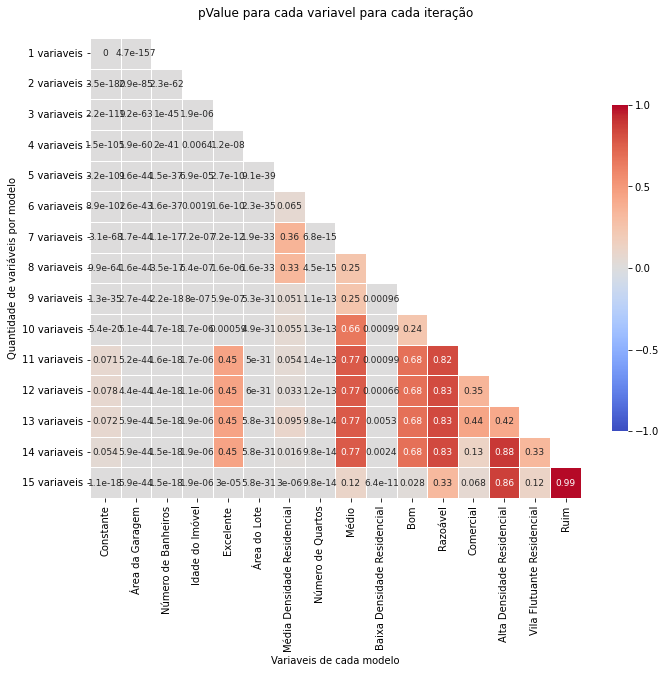

In [16]:
# Organizo um dataframe com os valores p value
linhas = [str(x + 1) + " variaveis" for x in range(ordem_corr_var_ind.shape[0])]
colunas = ordem_corr_var_ind.index.insert(0,"Constante")
avaliacao_pvalue = pd.DataFrame(p_value_total, columns=colunas, index=linhas)


# Matriz de correlação com números
corr_matrix = avaliacao_pvalue
mask = np.zeros_like(corr_matrix, dtype=np.bool)
# mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(11, 15))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 9})

#add the column names as labels
ax.set_yticklabels(corr_matrix.index)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.title('pValue para cada variavel para cada iteração\n')
plt.xlabel('Variaveis de cada modelo')
plt.ylabel('Quantidade de variáveis por modelo')

# Rodando regressao simples entre preco e variaveis independentes

In [17]:
#lista com nome das variaveis independentes que serao adicionadas
variaveis_da_equacao = []
RSS = []
coef_determinacao = []


for variavel in range(ordem_corr_var_ind.shape[0]):
    # nome da variavel que estou add no modelo
    nome_varivel_ind_add = ordem_corr_var_ind.index[variavel]
    
    #conjunto das variaveis independentes
    X = df[[nome_varivel_ind_add]].values
    
    #variavel dependente (preco)
    y = df[['Preço da venda']].values
    
    #instancio classe de regressao linear
    lm = LinearRegression()

    # faco o fit dos dados
    lm.fit(X,y)

    # Geracao da previsao baseado no conjunto de variaveis independentes X
    yhat = lm.predict(X)
    
    # Residual sum of squares 
    RSS.append(np.mean((yhat - y) ** 2))
    
    # retorna o valor do R² - coeficiente de determinacao
    coef_determinacao.append(lm.score(X, y))
    
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     807.9
Date:                Mon, 04 Oct 2021   Prob (F-statistic):          4.69e-157
Time:                        18:45:44   Log-Likelihood:                -35708.
No. Observations:                2914   AIC:                         7.142e+04
Df Residuals:                    2912   BIC:                         7.143e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.213e+05   2270.359     53.419      0.0

Text(0.5, 1.0, 'RSS para cada regressao simples de cada variavel')

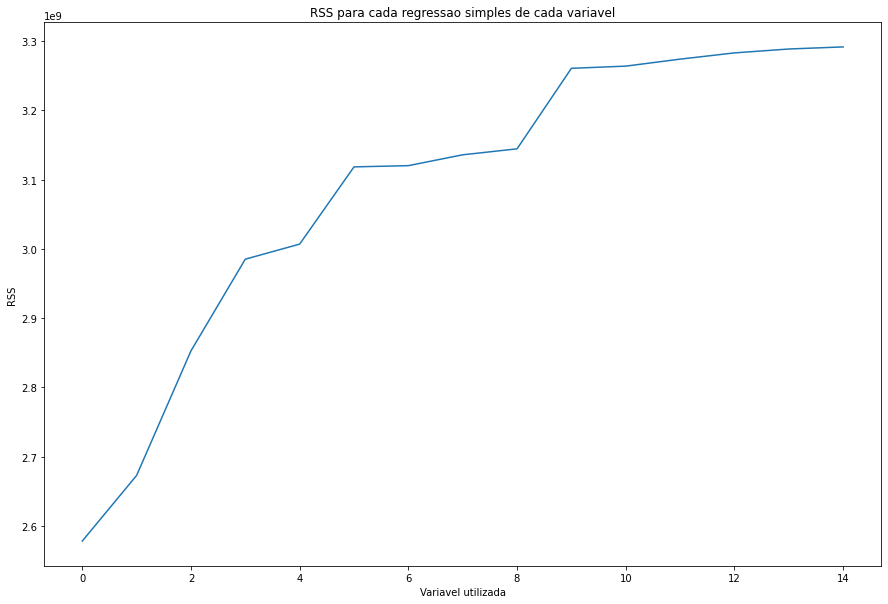

In [18]:
pd.DataFrame(RSS).plot(kind='line', legend=None, figsize=(15,10))
plt.xlabel("Variavel utilizada")
plt.ylabel("RSS")
plt.title("RSS para cada regressao simples de cada variavel")

Text(0.5, 1.0, 'Coeficiente de determinação da regressao simples para cada variavel')

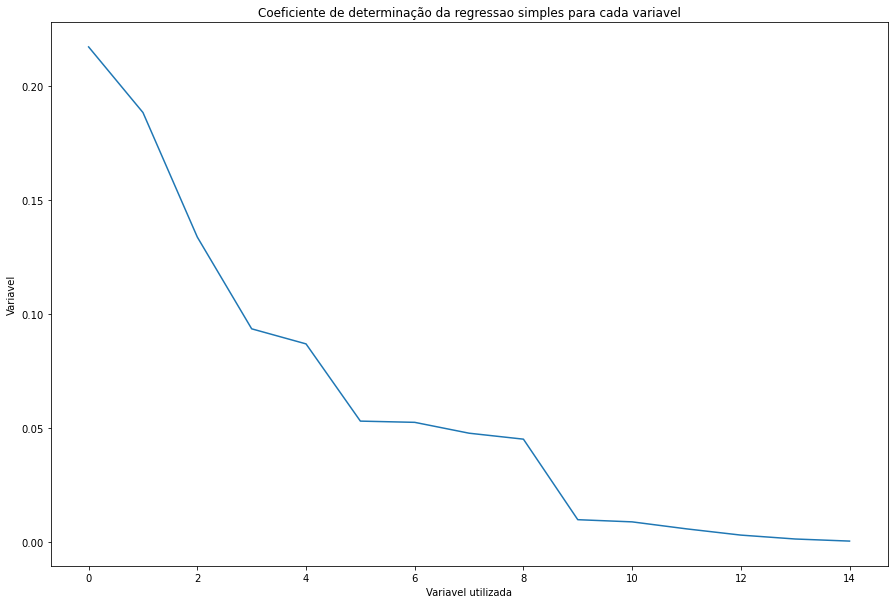

In [19]:
pd.DataFrame(coef_determinacao).plot(kind='line', legend=None, figsize=(15,10))
plt.xlabel("Variavel utilizada")
plt.ylabel("Variavel")
plt.title("Coeficiente de determinação da regressao simples para cada variavel")

In [20]:
df.columns

Index(['Preço da venda', 'Zona', 'Qualidade do Aquecimento',
       'Número de Quartos', 'Área da Garagem', 'Área do Lote',
       'Número de Banheiros', 'Idade do Imóvel', 'Alta Densidade Residencial',
       'Baixa Densidade Residencial', 'Comercial',
       'Média Densidade Residencial', 'Vila Flutuante Residencial', 'Bom',
       'Excelente', 'Médio', 'Razoável', 'Ruim'],
      dtype='object')

In [21]:
ordem_corr_var_ind

,Preço da venda
Área da Garagem,0.466028
Número de Banheiros,0.434038
Idade do Imóvel,0.365714
Excelente,0.305779
Área do Lote,0.294774
Média Densidade Residencial,0.230241
Número de Quartos,0.229069
Médio,0.218427
Baixa Densidade Residencial,0.212352
Bom,0.098826


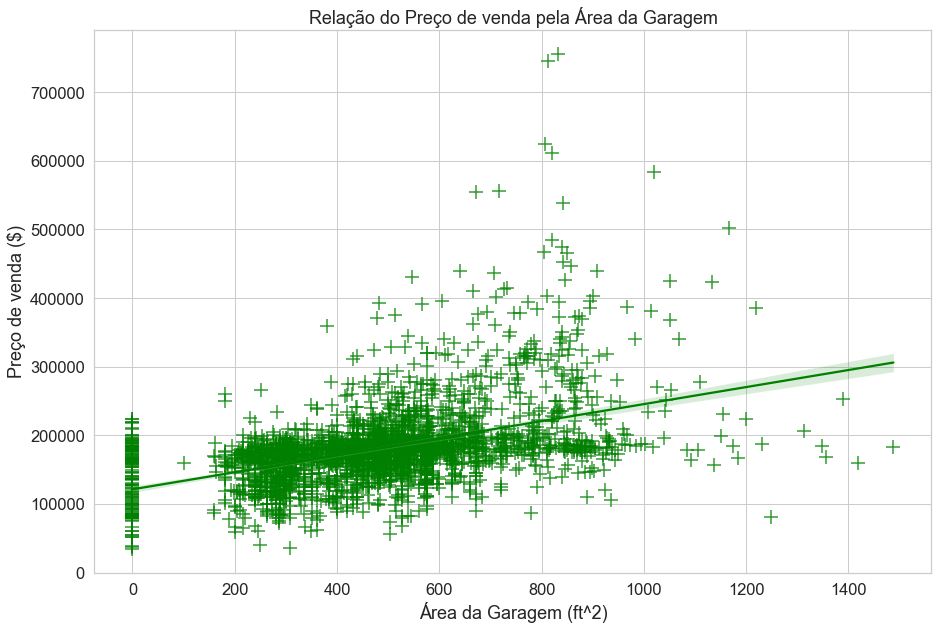

In [22]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='Área da Garagem', y='Preço da venda', data=df, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Área da Garagem (ft^2)', ylabel='Preço de venda ($)')
ax.set_title('Relação do Preço de venda pela Área da Garagem')
plt.show()

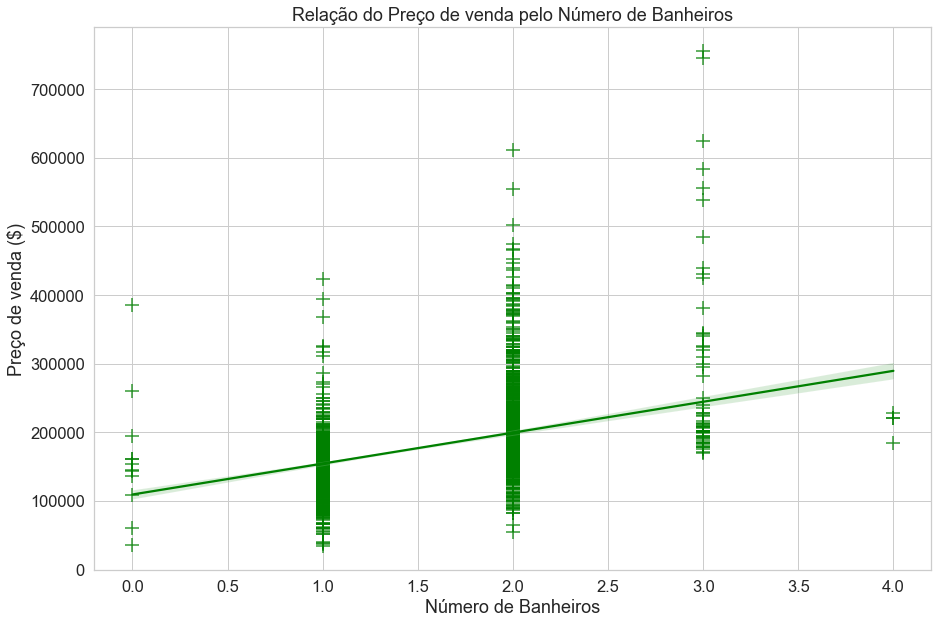

In [23]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='Número de Banheiros', y='Preço da venda', data=df, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Número de Banheiros', ylabel='Preço de venda ($)')
ax.set_title('Relação do Preço de venda pelo Número de Banheiros')
plt.show()

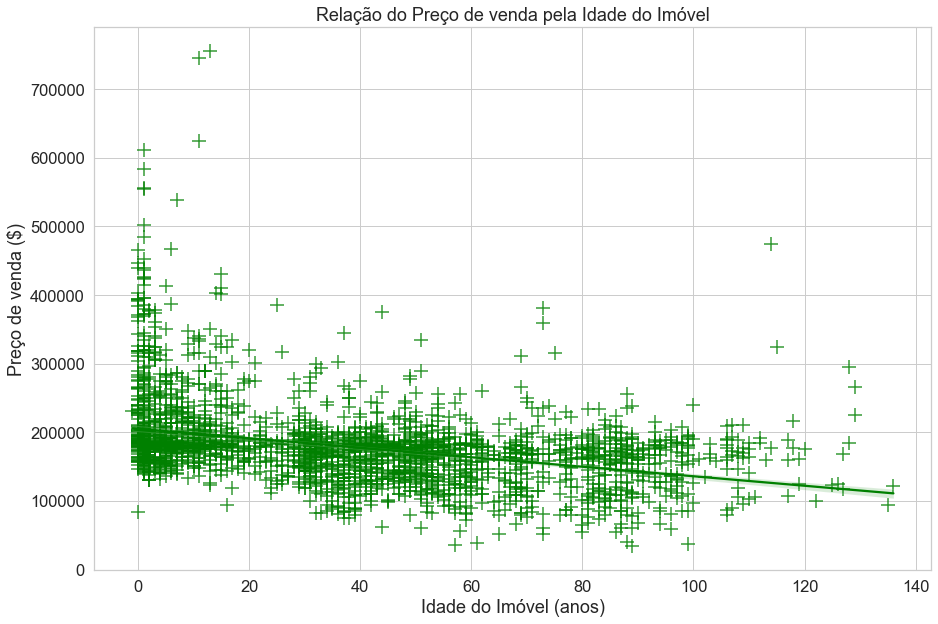

In [24]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='Idade do Imóvel', y='Preço da venda', data=df, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Idade do Imóvel (anos)', ylabel='Preço de venda ($)')
ax.set_title('Relação do Preço de venda pela Idade do Imóvel')
plt.show()

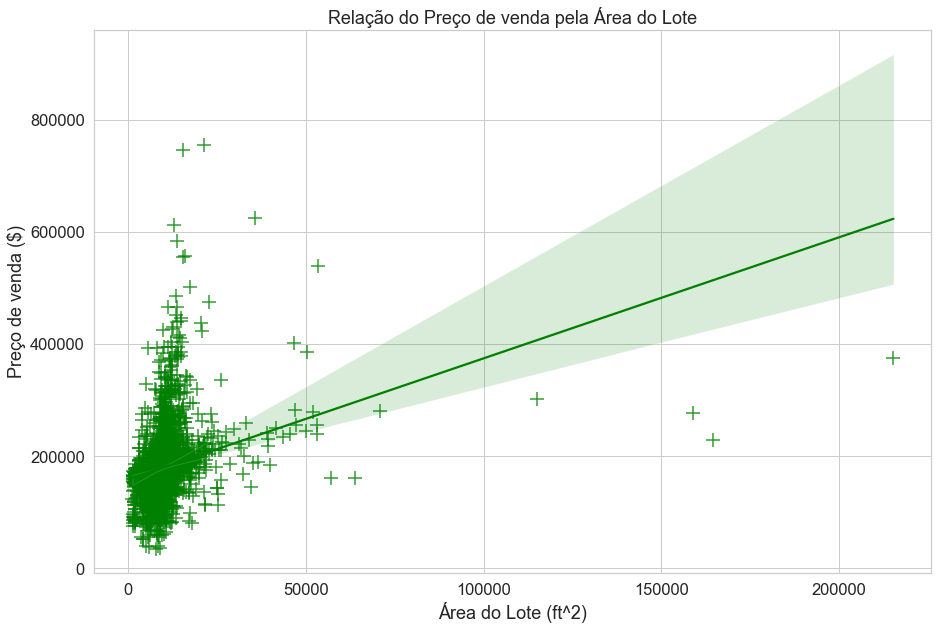

In [25]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='Área do Lote', y='Preço da venda', data=df, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Área do Lote (ft^2)', ylabel='Preço de venda ($)')
ax.set_title('Relação do Preço de venda pela Área do Lote')
plt.show()

# Avaliando casos especiais

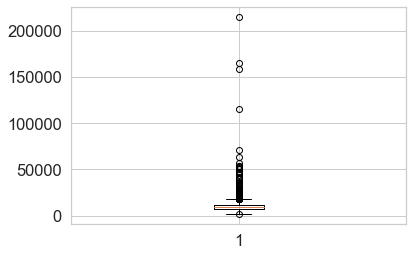

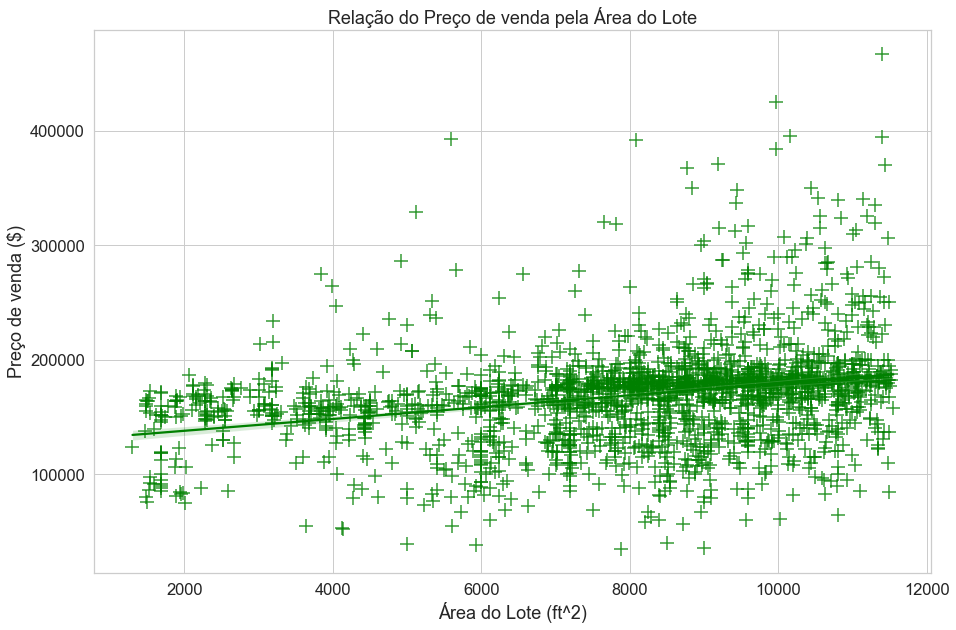

In [26]:
#Eliminando outliers para construir o gráfico de regressao considerando Area do lote

boxplot = plt.boxplot(df['Área do Lote'])
limite_superior = [item.get_ydata() for item in boxplot['whiskers']][1][0]


plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='Área do Lote', y='Preço da venda', data=df[df['Área do Lote'] < limite_superior], color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Área do Lote (ft^2)', ylabel='Preço de venda ($)')
ax.set_title('Relação do Preço de venda pela Área do Lote')
plt.show()

# Retirando outliers das variáveis quantitativas originais (e não aquelas variáveis categóricas)

In [27]:
df_sem_outlier = df.copy()

In [28]:
for variavel in ordem_corr_var_ind.index:
    # Calculo dos limites superiores e inferiores de cada 
    limite_superior = df[variavel].mean() + 3*df[variavel].std()
    limite_inferior = df[variavel].mean() - 3*df[variavel].std()
    df_sem_outlier = df_sem_outlier[df_sem_outlier[variavel] < limite_superior]
    df_sem_outlier = df_sem_outlier[df_sem_outlier[variavel] > limite_inferior]

In [29]:
print("Foram retirados ", df.shape[0] - df_sem_outlier.shape[0]," exemplos")

Foram retirados  353  exemplos


In [30]:
corr_matrix_sem_outliers = df_sem_outlier.corr()

#colocar os valores de correlação tudo positivo
ordem_corr_var_ind_sem_outliers = corr_matrix_sem_outliers[['Preço da venda']].applymap(lambda x: x if x > 0 else -1*x)
ordem_corr_var_ind_sem_outliers = ordem_corr_var_ind_sem_outliers.sort_values(['Preço da venda'], ascending=False)
ordem_corr_var_ind_sem_outliers = ordem_corr_var_ind_sem_outliers.drop(['Preço da venda'])
ordem_corr_var_ind_sem_outliers

,Preço da venda
Área da Garagem,0.478215
Número de Banheiros,0.452607
Idade do Imóvel,0.376647
Área do Lote,0.366751
Excelente,0.311754
Número de Quartos,0.245408
Médio,0.244186
Média Densidade Residencial,0.237476
Baixa Densidade Residencial,0.237476
Bom,0.112004


## Rodo agora a mesma análise de adicionar variáveis independentes no modelo de regressão na ordem das suas respectivas correlações

In [31]:
#lista com nome das variaveis independentes que serao adicionadas
variaveis_da_equacao_sem_outlier = []
RSS_sem_outlier = []
coef_determinacao_sem_outlier = []
p_value_sem_outlier = []

for variavel in range(ordem_corr_var_ind_sem_outliers.shape[0]):
    
    # nome da variavel que estou add no modelo
    nome_varivel_ind_add = ordem_corr_var_ind_sem_outliers.index[variavel]
    
    # adiciono a variavel na lista
    variaveis_da_equacao_sem_outlier.append(nome_varivel_ind_add)
    
    #conjunto das variaveis independentes
    X = df_sem_outlier[variaveis_da_equacao_sem_outlier].values
    
    #variavel dependente (preco)
    y = df_sem_outlier[['Preço da venda']].values
    
    #instancio classe de regressao linear
    lm = LinearRegression()

    # faco o fit dos dados
    lm.fit(X,y)

    # Geracao da previsao baseado no conjunto de variaveis independentes X
    yhat = lm.predict(X)
    
    # Residual sum of squares 
    RSS_sem_outlier.append(np.mean((yhat - y) ** 2))
    
    # retorna o valor do R² - coeficiente de determinacao
    coef_determinacao_sem_outlier.append(lm.score(X, y))
    
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    
    # registro os pvalues
    p_value_sem_outlier.append(list((pd.DataFrame(est2.pvalues))[0]))

    print(est2.pvalues)
    
    print(est2.summary())    
    print()

[0.00000000e+000 1.68721347e-146]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     758.7
Date:                Mon, 04 Oct 2021   Prob (F-statistic):          1.69e-146
Time:                        18:45:46   Log-Likelihood:                -31293.
No. Observations:                2561   AIC:                         6.259e+04
Df Residuals:                    2559   BIC:                         6.260e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.184e

/Users/yamada/miniconda3/envs/.venv/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/yamada/miniconda3/envs/.venv/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/yamada/miniconda3/envs/.venv/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/yamada/miniconda3/envs/.venv/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/yamada/miniconda3/envs/.venv/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in d

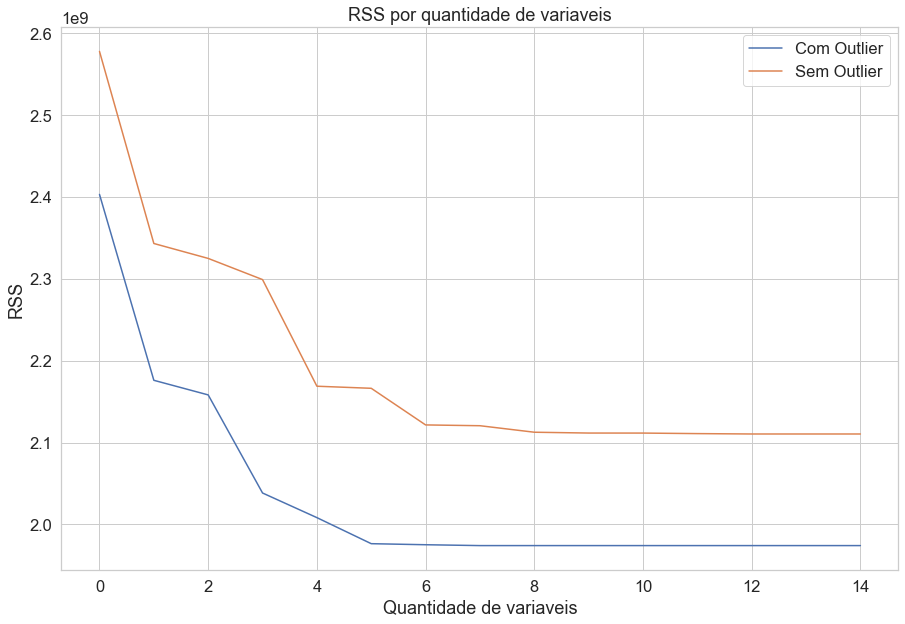

In [32]:
ax = pd.DataFrame(RSS_sem_outlier,columns=['Com Outlier']).plot(kind='line', figsize=(15,10))
pd.DataFrame(RSS_total, columns=['Sem Outlier']).plot(kind='line', ax = ax)
plt.xlabel("Quantidade de variaveis")
plt.ylabel("RSS")
plt.title("RSS por quantidade de variaveis")
plt.show()

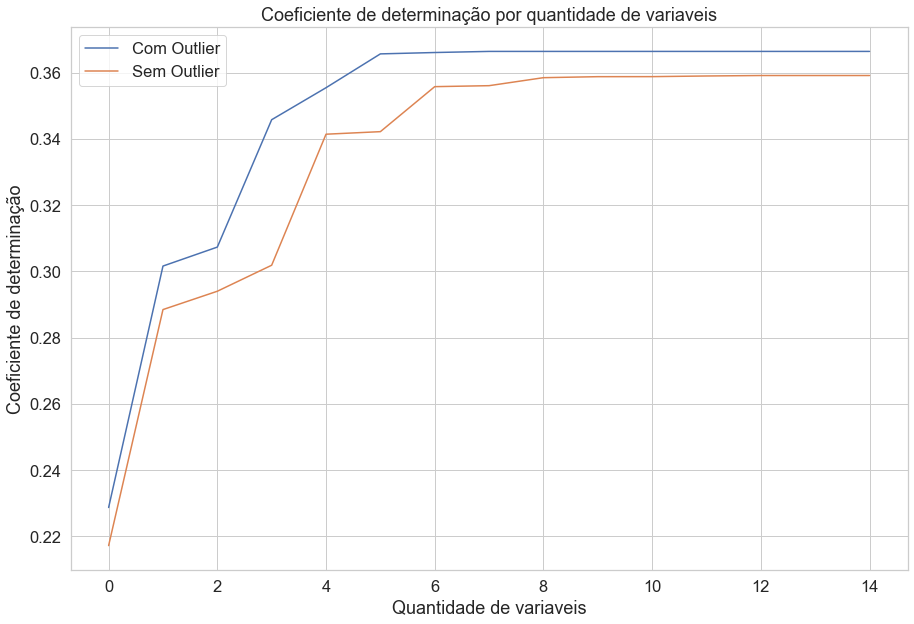

In [33]:
ax = pd.DataFrame(coef_determinacao_sem_outlier,columns=['Com Outlier']).plot(kind='line', figsize=(15,10))
pd.DataFrame(coef_determinacao_total, columns=['Sem Outlier']).plot(kind='line', ax = ax)
plt.xlabel("Quantidade de variaveis")
plt.ylabel("Coeficiente de determinação")
plt.title("Coeficiente de determinação por quantidade de variaveis")
plt.show()

<ipython-input-34-e333e9ba4ae9>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


Text(70.5, 0.5, 'Quantidade de variáveis por modelo')

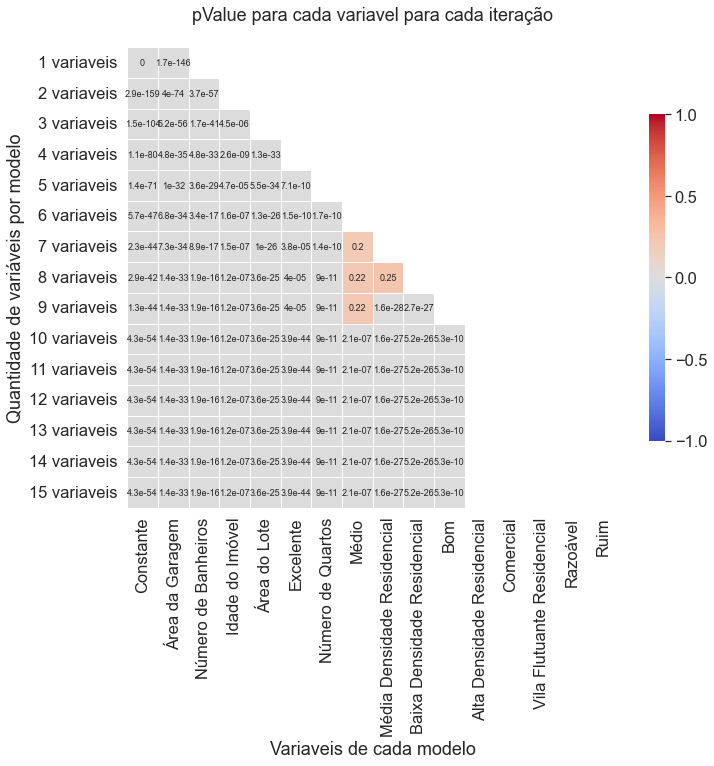

In [34]:
# Organizo um dataframe com os valores p value
linhas = [str(x + 1) + " variaveis" for x in range(ordem_corr_var_ind_sem_outliers.shape[0])]
colunas = ordem_corr_var_ind_sem_outliers.index.insert(0,"Constante")
avaliacao_pvalue = pd.DataFrame(p_value_sem_outlier, columns=colunas, index=linhas)


# Matriz de correlação com números
corr_matrix = avaliacao_pvalue
mask = np.zeros_like(corr_matrix, dtype=np.bool)
# mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(11, 15))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 9})

#add the column names as labels
ax.set_yticklabels(corr_matrix.index)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.title('pValue para cada variavel para cada iteração\n')
plt.xlabel('Variaveis de cada modelo')
plt.ylabel('Quantidade de variáveis por modelo')

In [35]:
corr_matrix.shape

(15, 16)

In [36]:
1+1

2

In [37]:
ordem_corr_var_ind

,Preço da venda
Área da Garagem,0.466028
Número de Banheiros,0.434038
Idade do Imóvel,0.365714
Excelente,0.305779
Área do Lote,0.294774
Média Densidade Residencial,0.230241
Número de Quartos,0.229069
Médio,0.218427
Baixa Densidade Residencial,0.212352
Bom,0.098826


In [41]:
#lista com nome das variaveis independentes que serao adicionadas
variaveis_da_equacao = []
RSS_total = []
coef_determinacao_total = []
p_value_total = []
ordem_corr_var_ind_5 = ordem_corr_var_ind[:5]
for variavel in range(ordem_corr_var_ind_5.shape[0]):
    # nome da variavel que estou add no modelo
    nome_varivel_ind_add = ordem_corr_var_ind_5.index[variavel]
    
    # adiciono a variavel na lista
    variaveis_da_equacao.append(nome_varivel_ind_add)
    
    #conjunto das variaveis independentes
    X = df[variaveis_da_equacao].values
    
    #variavel dependente (preco)
    y = df[['Preço da venda']].values
    
    #instancio classe de regressao linear
    lm = LinearRegression()

    # faco o fit dos dados
    lm.fit(X,y)

    # Geracao da previsao baseado no conjunto de variaveis independentes X
    yhat = lm.predict(X)
    
    # Residual sum of squares 
    RSS_total.append(np.mean((yhat - y) ** 2))
    
    # retorna o valor do R² - coeficiente de determinacao
    coef_determinacao_total.append(lm.score(X, y))
    
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    
    # registro os pvalues
    p_value_total.append(list((pd.DataFrame(est2.pvalues))[0]))
    
    print(est2.summary())    

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     807.9
Date:                Mon, 04 Oct 2021   Prob (F-statistic):          4.69e-157
Time:                        19:20:02   Log-Likelihood:                -35708.
No. Observations:                2914   AIC:                         7.142e+04
Df Residuals:                    2912   BIC:                         7.143e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.213e+05   2270.359     53.419      0.0

In [47]:
df_residuos = pd.DataFrame(yhat-y,columns=['Residuos'])

<AxesSubplot:>

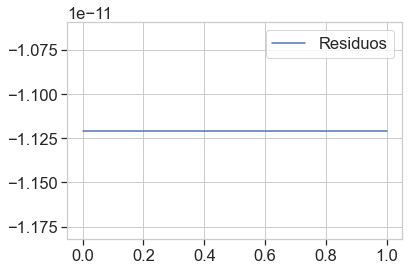

In [69]:
pd.DataFrame([df_residuos.mean(),df_residuos.mean()]).plot(kind='line')

In [81]:
media_res = df_residuos.mean()
tabela = [media_res for x in range(df_residuos.shape[0])]

In [55]:
df_residuos.mean()

Residuos   -1.120607e-11
dtype: float64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'Amostra')

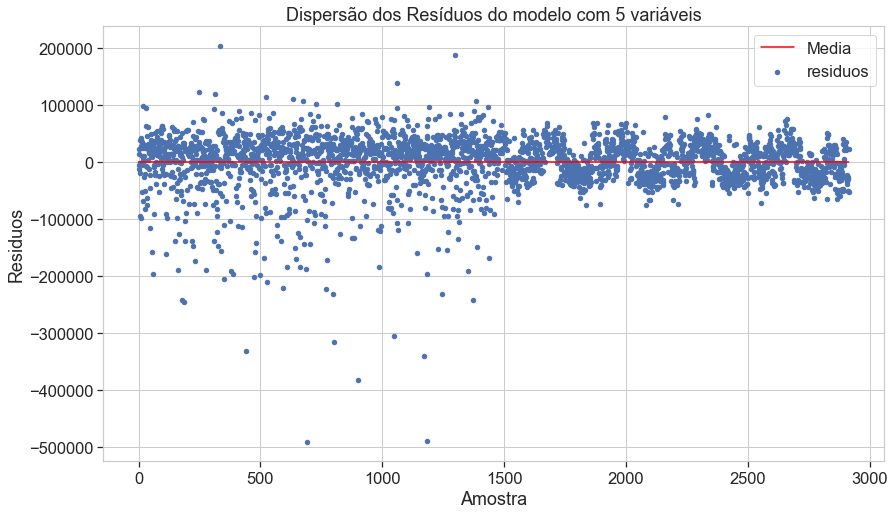

In [87]:
ax = pd.DataFrame(tabela).plot(kind='line', figsize=(14,8), color='red')
df_residuos.reset_index().plot(kind='scatter', x = 'index', y='Residuos', ax=ax)
plt.legend(['Media','residuos'])
plt.title('Dispersão dos Resíduos do modelo com 5 variáveis')
plt.xlabel('Amostra')

In [91]:
def curva_normal(df):
    mu, std = norm.fit(df) 
    # Plot
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    plt.plot(x, p, 'k', linewidth=2)

Text(0.5, 0, 'Resíduos')

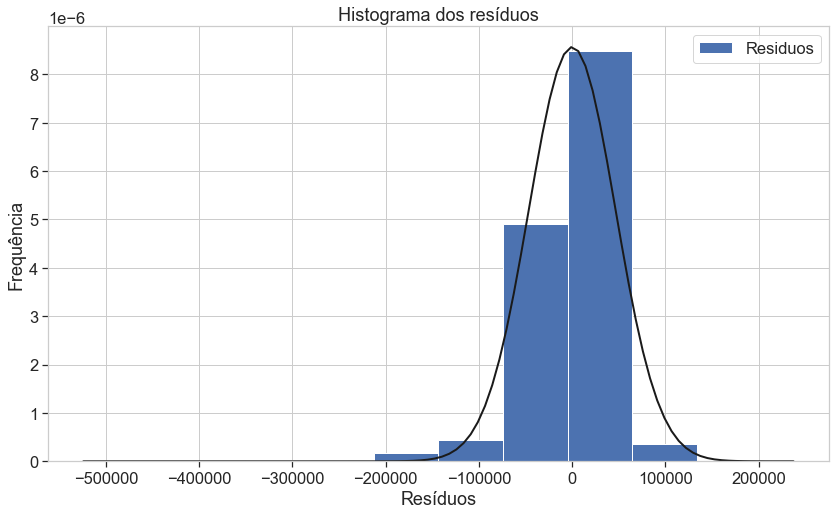

In [96]:
df_residuos.plot(kind='hist', density=True, figsize=(14,8))
curva_normal(df_residuos)
plt.title('Histograma dos resíduos')
plt.ylabel('Frequência')
plt.xlabel('Resíduos')